In [ ]:
#hapiness_complete.csv

In [1]:
%matplotlib inline

In [2]:
import time
import matplotlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

from plotly.offline import iplot, download_plotlyjs, init_notebook_mode, plot
from chart_studio.plotly import plot, iplot

import os
import sys

In [3]:
happiness = pd.read_csv('hapiness_complete.csv')
happiness.describe()

,Unnamed: 0,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Perceptions of corruption
count,2098.000000,2098.000000,149.000000,149.000000,2085.000000,149.000000,2066.000000,2009.000000,1949.000000,1913.000000,1894.000000,1839.000000
mean,1048.500000,2013.768827,5.532839,9.432208,0.812709,64.992799,0.746094,-0.001027,5.466705,9.368453,63.359374,0.747125
std,605.784753,4.486449,1.073924,1.158601,0.118203,6.762043,0.140766,0.161400,1.115711,1.154084,7.510245,0.186789
min,0.000000,2005.000000,2.523000,6.635000,0.290000,48.478000,0.258000,-0.335000,2.375000,6.635000,32.300000,0.035000
25%,524.250000,2010.000000,4.852000,8.541000,0.750000,59.802000,0.652000,-0.115000,4.640000,8.464000,58.685000,0.690000
50%,1048.500000,2014.000000,5.534000,9.569000,0.835000,66.603000,0.767000,-0.027000,5.386000,9.460000,65.200000,0.802000
75%,1572.750000,2018.000000,6.255000,10.421000,0.905000,69.600000,0.859000,0.089000,6.283000,10.353000,68.590000,0.872000
max,2097.000000,2021.000000,7.842000,11.647000,0.987000,76.953000,0.985000,0.698000,8.019000,11.648000,77.100000,0.983000


In [4]:
print ('Dimension of dataset: happiness.shape')
happiness.dtypes

Dimension of dataset: happiness.shape


Unnamed: 0                            int64
Country name                         object
year                                  int64
Ladder score                        float64
Logged GDP per capita               float64
Social support                      float64
Healthy life expectancy             float64
Freedom to make life choices        float64
Generosity                          float64
Life Ladder                         float64
Log GDP per capita                  float64
Healthy life expectancy at birth    float64
Perceptions of corruption           float64
dtype: object

### Visualization: Correlations among variables

First, we are building an understanding between the variables that have been provided in this dataset. We are computing the correlations among the variables in a heat map.

/var/folders/dn/kc445x893192vp18hkvcvs000000gn/T/ipykernel_6550/1720580804.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



<AxesSubplot:>

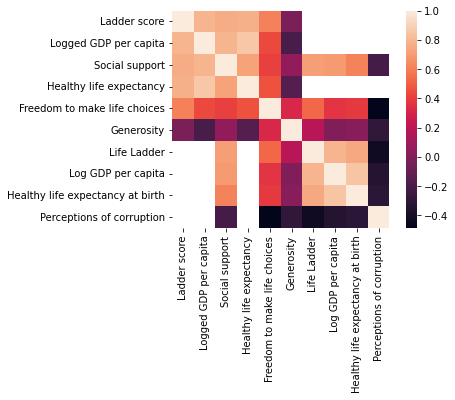

In [5]:
happiness.hm = happiness[['Ladder score', 'Logged GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Perceptions of corruption']]
cor = happiness.hm.corr()
sns.heatmap(cor, square = True)

### Outcome :
The color pallete on the side of the heat map is represented as the amount of correlations among the variables. To go more into depth, the lighter shades represent the higher correlations the variables share. The higher score is shown in the middle of the heat map going down diagonally. Overall, Ladder score is shown to be the happiest score from all columns. Freedom to make life choices is the least happiest score.

### Visualization of Happiness 

In [11]:
wcc = pd.read_csv('wikipedia-iso-country-codes.csv')
wcc

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


## Visualization: Mortality

new dataset

In [13]:
mortality = pd.read_csv('MortalityDataWHR2021C2.csv')
mortality.describe()

,Population 2020,Population 2019,Island,WHO Western Pacific Region,Female head of government,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020"
count,1.640000e+02,1.640000e+02,166.000000,166.000000,166.000000,6.300000e+01,6.400000e+01,6.400000e+01,6.500000e+01
mean,4.718124e+07,4.646257e+07,0.132530,0.084337,0.138554,2.543131e+05,2.543317e+05,2.552972e+05,2.984399e+05
std,1.598697e+08,1.568124e+08,0.340092,0.278734,0.346526,4.835330e+05,4.844878e+05,4.861756e+05,5.654272e+05
min,3.412500e+05,3.613130e+05,0.000000,0.000000,0.000000,2.229000e+03,2.247000e+03,2.200000e+03,2.321000e+03
25%,4.827881e+06,4.730215e+06,0.000000,0.000000,0.000000,2.884000e+04,3.015150e+04,2.995400e+04,3.317700e+04
50%,1.126017e+07,1.116260e+07,0.000000,0.000000,0.000000,7.004900e+04,6.932850e+04,7.049700e+04,9.155300e+04
75%,3.380537e+07,3.375262e+07,0.000000,0.000000,0.000000,1.696710e+05,1.722710e+05,1.743490e+05,2.145030e+05
max,1.439324e+09,1.397715e+09,1.000000,1.000000,1.000000,2.810927e+06,2.839076e+06,2.852747e+06,3.424996e+06


In [15]:
print= ('Dimensions of dataset: mortality.shape')
mortality.dtypes

Country name                                                                    object
Population 2020                                                                float64
Population 2019                                                                float64
COVID-19 deaths per 100,000 population in 2020                                  object
Median age                                                                      object
Island                                                                           int64
Index of exposure to COVID-19  infections in other countries as of March 31     object
Log of average distance to SARS countries                                       object
WHO Western Pacific Region                                                       int64
Female head of government                                                        int64
Index of institutional trust                                                    object
Gini coefficient of income                 

## Cause of death

In [ ]:
mortality.hm = mortality[['Ladder score', 'Logged GDP per capita', 'Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Life Ladder', 'Log GDP per capita', 'Healthy life expectancy at birth', 'Perceptions of corruption']]
cor = happiness.hm.corr()
sns.heatmap(cor, square = True)

## Merging Mortality and Happiness
description